In [26]:
import numpy as np
import matplotlib.pyplot as plt

In [27]:
ACTION_SPACE = ('U', 'D', 'L', 'R')
class Grid:  # Environment

    def __init__(self,rows,cols,start):
        self.rows = rows
        self.cols = cols
        self.i = start[0]
        self.j = start[1]

    def set(self, rewards, actions):

        self.rewards = rewards
        self.actions = actions

    def set_state(self, s):
        self.i = s[0]
        self.j = s[1]

    def current_state(self):
        return (self.i, self.j)

    def is_terminal(self, s):
        return s not in self.actions
    
    def move(self, action):
    # check if legal move first
        if action in self.actions[(self.i, self.j)]:
            if action == 'U':
                self.i -= 1
            elif action == 'D':
                self.i += 1
            elif action == 'R':
                self.j += 1
            elif action == 'L':
                self.j -= 1
        return self.rewards.get((self.i, self.j), 0)

    def game_over(self):
        # returns true if game is over, else false
        # true if we are in a state where no actions are possible
        return (self.i, self.j) not in self.actions

    def all_states(self):
        return set(self.actions.keys()) | set(self.rewards.keys())



In [28]:
def standard_grid():

  # .  .  .  1
  # .  x  . -1
  # s  .  .  .

    grid = Grid(3, 4, (2, 0))
    rewards = {(0, 3): 1, (1, 3): -1}
    actions = {
        (0, 0): ('D', 'R'),
        (0, 1): ('L', 'R'),
        (0, 2): ('L', 'D', 'R'),
        (1, 0): ('U', 'D'),
        (1, 2): ('U', 'D', 'R'),
        (2, 0): ('U', 'R'),
        (2, 1): ('L', 'R'),
        (2, 2): ('L', 'R', 'U'),
        (2, 3): ('L', 'U'),
        }
    grid.set(rewards, actions)
    return grid

In [29]:
def print_values(V, g):
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            v = V.get((i, j), 0)
            if v >= 0:
                print(" %.2f|" % v, end="")
            else:
                print("%.2f|" % v, end="")  
        print("")


def print_policy(P, g):
    for i in range(g.rows):
        print("---------------------------")
        for j in range(g.cols):
            a = P.get((i, j), " ")
            print("  %s  |" % a, end="")
        print("")


In [30]:
GAMMA = 0.9
LEARNING_RATE = 0.1
ALL_POSSIBLE_ACTIONS = ('U', 'D', 'L', 'R')

In [31]:
def play_game(grid, policy, max_steps=20):

    start_states = list(grid.actions.keys())
    start_idx = np.random.choice(len(start_states))
    grid.set_state(start_states[start_idx])

    s = grid.current_state()
    a = np.random.choice(ALL_POSSIBLE_ACTIONS) # first action is uniformly random
    states_actions_rewards = [(s, a, 0)]
    for _ in range(max_steps):
        r = grid.move(a)
        s = grid.current_state()

        if grid.game_over():
            states_actions_rewards.append((s, None, r))
            break
        else:
            a = policy[s]
            states_actions_rewards.append((s, a, r))


    G = 0
    states_actions_returns = []
    first = True
    for s, a, r in reversed(states_actions_rewards):
        if first:
            first = False
        else:
            states_actions_returns.append((s, a, G))
        G = r + GAMMA*G
        states_actions_returns.reverse() # we want it to be in order of state visited
    return states_actions_returns

In [32]:
def max_dict(d):

    max_key = None
    max_val = float('-inf')
    for k, v in d.items():
        if v > max_val:
            max_val = v
            max_key = k
    return max_key, max_val

In [33]:
grid = standard_grid()

print("rewards:")
print_values(grid.rewards, grid)
    
policy = {}
for s in grid.actions.keys():
    policy[s] = np.random.choice(ALL_POSSIBLE_ACTIONS)
print_policy(policy,grid)


rewards:
---------------------------
 0.00| 0.00| 0.00| 1.00|
---------------------------
 0.00| 0.00| 0.00|-1.00|
---------------------------
 0.00| 0.00| 0.00| 0.00|
---------------------------
  L  |  U  |  R  |     |
---------------------------
  U  |     |  L  |     |
---------------------------
  U  |  U  |  U  |  D  |


In [34]:
# initialize Q(s,a) and returns
Q = {}
states = grid.all_states()
for s in states:
    if s in grid.actions: # not a terminal state
        Q[s] = {}
        for a in ALL_POSSIBLE_ACTIONS:
            Q[s][a] = 0 # needs to be initialized to something so we can argmax it
    else:
          # terminal state or state we can't otherwise get to
        pass
    
Q

{(0, 1): {'U': 0, 'D': 0, 'L': 0, 'R': 0},
 (1, 2): {'U': 0, 'D': 0, 'L': 0, 'R': 0},
 (2, 1): {'U': 0, 'D': 0, 'L': 0, 'R': 0},
 (0, 0): {'U': 0, 'D': 0, 'L': 0, 'R': 0},
 (2, 0): {'U': 0, 'D': 0, 'L': 0, 'R': 0},
 (2, 3): {'U': 0, 'D': 0, 'L': 0, 'R': 0},
 (0, 2): {'U': 0, 'D': 0, 'L': 0, 'R': 0},
 (2, 2): {'U': 0, 'D': 0, 'L': 0, 'R': 0},
 (1, 0): {'U': 0, 'D': 0, 'L': 0, 'R': 0}}

---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  R  |  R  |  U  |  L  |



---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  R  |  R  |  U  |  L  |



---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  R  |  U  |  L  |



---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  R  |  U  |  L  |



---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  R  |  U  |  L  |



---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  R  |  U  |  L  |





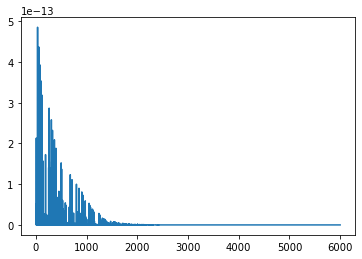

final policy:
---------------------------
  R  |  R  |  R  |     |
---------------------------
  U  |     |  U  |     |
---------------------------
  U  |  R  |  U  |  L  |


In [36]:
deltas = []
for t in range(6000):
    if t % 1000 == 0:
        print_policy(policy,grid)
        print("\n\n")

    # generate an episode using pi
    biggest_change = 0
    states_actions_returns = play_game(grid, policy)
    seen_state_action_pairs = set()
    for s, a, G in states_actions_returns:

        sa = (s, a)
        if sa not in seen_state_action_pairs:
            old_q = Q[s][a]
            Q[s][a] = old_q + LEARNING_RATE * (G - old_q)
            biggest_change = max(biggest_change, np.abs(old_q - Q[s][a]))
            seen_state_action_pairs.add(sa)
            
    deltas.append(biggest_change)

    # update policy
    for s in policy.keys():
        policy[s] = max_dict(Q[s])[0]
        
plt.plot(deltas)
plt.show()

print("final policy:")
print_policy(policy, grid)
